In [2]:
import pandas_ta as ta
from backtesting import Strategy
from backtesting.lib import crossover
from backtesting import Backtest
from backtesting.test import SMA, GOOG
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [42]:
# Fetch real data using yfinance
ticker = 'AAPL'  # Replace with the desired stock symbol
data = yf.download(ticker, start='2022-01-01', end='2023-01-01')

# Calculate moving averages using pandas rolling method
short_window = 40
long_window = 100
data['short_mavg'] = data['Close'].rolling(window=short_window).mean()
data['long_mavg'] = data['Close'].rolling(window=long_window).mean()

# Define the moving average crossover strategy using backtesting library
class MovingAverageCrossoverStrategy(Strategy):
    def init(self):
        pass

    def next(self):
        self.buy()
        # Buy signal: short MA crosses above long MA
        if crossover(self.data['short_mavg'], self.data['long_mavg']):
            self.buy()

        # Sell signal: short MA crosses below long MA
        elif crossover(self.data['long_mavg'], self.data['short_mavg']):
            self.buy()


# Backtest the strategy
bt = Backtest(data, MovingAverageCrossoverStrategy, commission=0.001, cash = 1000 )
stats = bt.run()

# Visualize the backtest results
bt.plot(plot_volume=False)

# plt.title('Moving Average Crossover Strategy - Backtest Results')
# plt.show()


[*********************100%%**********************]  1 of 1 completed

GridPlot(id='p5945', ...)

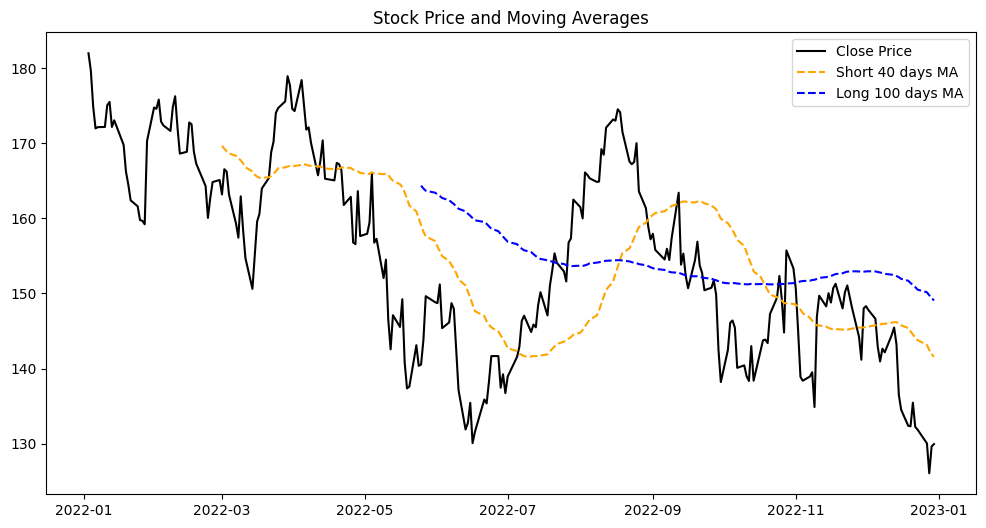

In [29]:
plt.figure(figsize=(12, 6))

plt.plot(data['Close'], label='Close Price', color='black')
plt.plot(data['short_mavg'], label=f'Short {short_window} days MA', linestyle='--', color='orange')
plt.plot(data['long_mavg'], label=f'Long {long_window} days MA', linestyle='--', color='blue')
plt.title('Stock Price and Moving Averages')
plt.legend()

# Show the plot
plt.show()